# Figure MotionClouds

In [1]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import csv
import imageio
import warnings
import MotionClouds as MC
import itertools

downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X//downscale, mc.N_Y//downscale, mc.N_frame//downscale)

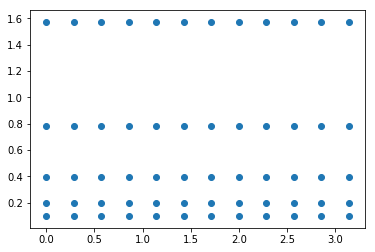

In [2]:
# Orientations
N_thetas = 12
thetas = np.linspace(0,np.pi, N_thetas) # we offset by pi/2 to prevent problems with matplotlib's displays and psychopy

# Noise
B_thetas = [np.pi/32, np.pi/16, np.pi/8, np.pi/4, np.pi/2] 

# Presentation of each pattern
stim_duration = 2 #s

# Repetition of each block
repetition = 15

rng = np.random.RandomState(42)
sequence = list(itertools.product(thetas, B_thetas))
rng.shuffle(sequence)

plt.scatter(*zip(*sequence))

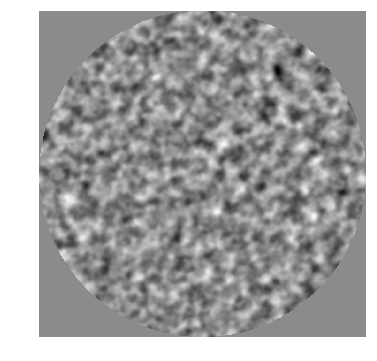

In [4]:
import imageio.core.util

def silence_imageio_warning(*args, **kwargs):
    pass

imageio.core.util._precision_warn = silence_imageio_warning

def get_keypress():
    keys = event.getKeys()
    if keys:
        return keys[0]
    else:
        return None

def generate_cloud(theta, b_theta, itr,
                   N_X, N_Y, seed, contrast=1.,
                  transition = False, save = True):
    
    fx, fy, ft = mc.get_grids(N_X, N_Y, 1)
    disk = mc.frequency_radius(fx, fy, ft) < .5

    mc_i = mc.envelope_gabor(fx, fy, ft,
                             V_X=0., V_Y=0., B_V=0.,
                             sf_0=sf_0, B_sf=B_sf,
                             theta=theta, B_theta=b_theta)

    im_ = np.zeros((N_X, N_Y,1))
    im_ += mc.rectif(mc.random_cloud(mc_i, seed=seed),
                     contrast=contrast)
    im_ *= disk  # masking outside the disk
    im_ += -.5
    im_ += .5*(1-disk)  # gray outside the disk

    return im_

width = 29.7*256/1050
N_X, N_Y = 1024, 1024
sf_0 = 4*width/N_X/2
B_sf = sf_0
tet = sequence[4][0]
btet = sequence[40][1]
im = generate_cloud(tet, btet, 1, N_X, N_Y, 42, transition = True, save = True)

fig = plt.figure(figsize = (12,6))
plt.axis('off')
plt.imshow(im[:,:,0], cmap = plt.cm.gray)
fig.savefig('MC_T%.2f_BT%.2f.svg' % (tet, btet), format = 'svg', bbox_inches = 'tight', transparent = True)